# ` Problem Statement ` 

> Indented block

**Data Science Problem Statement**

Your client is an Insurance company and they need your help in building a model to predict
whether the policyholder (customer) will pay next premium on time or not.

**Evaluation Metric**

Our evaluation will based on AUC-ROC score




### **Understanding the Data set**

Now, in order to predict whether the customer would pay the next premium or not, you have
information about past premium payment history for the policyholders along with their
demographics (age, monthly income, area type) and sourcing channel etc.


There are two data sets : **`train.csv`**  including the target feature.

`test.csv` which is the test data set without the target feature.

## Importing necessary libraries

The following code is written in Python 3.x. Libraries provide pre-written functionality to perform necessary tasks.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



# Data loading and Cleaning




*  In this task, we'll load the dataframe in pandas, drop the unnecessary columns and display the top five rows of the dataset.

In [2]:
# Loading the dataframe

df = pd.read_csv('train_file.csv')

print(df.shape)

df.head()


(79853, 12)


,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


# Variable identification#

In [3]:
# CHECK THE DATATYPES OF ALL COLUMNS:
    
print(df.dtypes)


id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
target                                int64
dtype: object


# classifying our given data as :
* categorical variables
* numerical variables

In [4]:
# IDENTIFYING CATEGORICAL FEATURES
# Finding the total missing values and arranging them in ascending order
total = df.isnull().sum()

# Converting the missing values in percentage
percent = (df.isnull().sum()/df.isnull().count())
print(percent)
df.head()

id                                  0.000000
perc_premium_paid_by_cash_credit    0.000000
age_in_days                         0.000000
Income                              0.000000
Count_3-6_months_late               0.001215
Count_6-12_months_late              0.001215
Count_more_than_12_months_late      0.001215
application_underwriting_score      0.037243
no_of_premiums_paid                 0.000000
sourcing_channel                    0.000000
residence_area_type                 0.000000
target                              0.000000
dtype: float64


,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [5]:

# IDENTIFYING NUMERICAL FEATURES

numeric_data = df.select_dtypes(include=np.number) # select_dtypes selects data with numeric features
numeric_col = numeric_data.columns   # we will store the numeric features in a variable

print("Numeric Features:")
print(numeric_data.head())

Numeric Features:
       id  perc_premium_paid_by_cash_credit  age_in_days  Income  \
0  110936                             0.429        12058  355060   
1   41492                             0.010        21546  315150   
2   31300                             0.917        17531   84140   
3   19415                             0.049        15341  250510   
4   99379                             0.052        31400  198680   

   Count_3-6_months_late  Count_6-12_months_late  \
0                    0.0                     0.0   
1                    0.0                     0.0   
2                    2.0                     3.0   
3                    0.0                     0.0   
4                    0.0                     0.0   

   Count_more_than_12_months_late  application_underwriting_score  \
0                             0.0                           99.02   
1                             0.0                           99.89   
2                             1.0                    

# Check Missing Data 

One of the main steps in data preprocessing is handling missing data. Missing data means absence of observations in columns that can be caused while procuring the data, lack of information, incomplete results etc. Feeding missing data to your machine learning model could lead to wrong prediction or classification. Hence it is necessary to identify missing values and treat them.

- In the code below, we calculate the total missing values and the percentage of missing values in every feature of the dataset.
- The code ideally returns a dataframe consisting of the feature names as index and two columns having the count and percentage of missing values in that feature.

In [6]:
# To identify the number of missing values in every feature

# Finding the total missing values and arranging them in ascending order
total = df.isnull().sum()

# Converting the missing values in percentage
print(percent)
print(total)


id                                  0.000000
perc_premium_paid_by_cash_credit    0.000000
age_in_days                         0.000000
Income                              0.000000
Count_3-6_months_late               0.001215
Count_6-12_months_late              0.001215
Count_more_than_12_months_late      0.001215
application_underwriting_score      0.037243
no_of_premiums_paid                 0.000000
sourcing_channel                    0.000000
residence_area_type                 0.000000
target                              0.000000
dtype: float64
id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                

# Univariate Analysis

In [7]:
df.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,1.000000


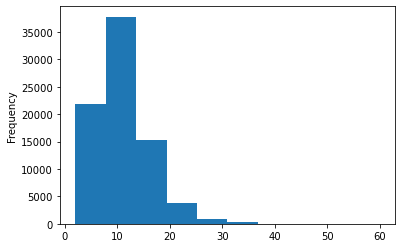

In [8]:
#plotting a histogram of no_of_premiums_paids
df["no_of_premiums_paid"].plot.hist()

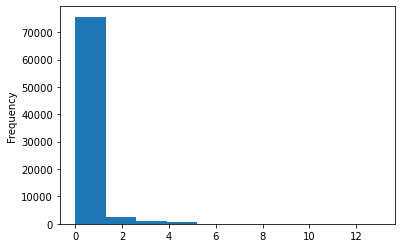

In [9]:
#plotting a box plot for no of premium paids
df['Count_3-6_months_late'].plot.hist()

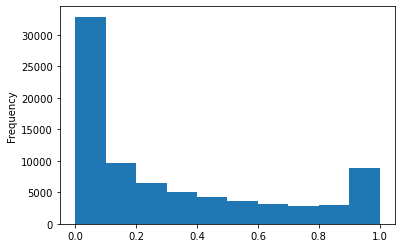

In [10]:
#plotting a histogram for perc premium paid by cash
df["perc_premium_paid_by_cash_credit"].plot.hist()

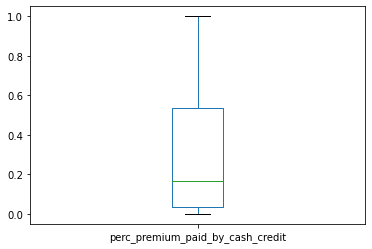

In [11]:
#plotting a box plot for perc premium paid by cash or credit
df["perc_premium_paid_by_cash_credit"].plot.box()

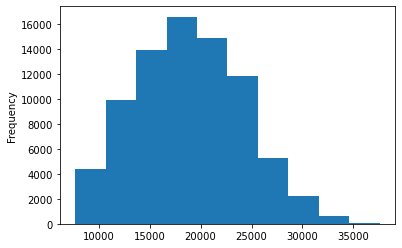

In [12]:
# plotting a histogram for age in days
df["age_in_days"].plot.hist()

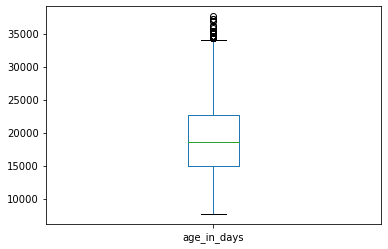

In [13]:
# plotting a box plot for age in days
df["age_in_days"].plot.box()

# Univariate analysis of categorical column 

Univariate analysis means analysis of a single variable. It’s mainly describes the characteristics of the variable.

If the variable is categorical we can use either a bar chart or a pie chart to find the distribution of the classes in the variable.
* The code plots the frequency of all the values in the categorical variables.

In [14]:
# Selecting the categorical columns

#creating frequency for area_type 
df["residence_area_type"].value_counts()

#creating percentages from frequencies
df["residence_area_type"].value_counts() / len(df["residence_area_type"])


Urban    0.603396
Rural    0.396604
Name: residence_area_type, dtype: float64

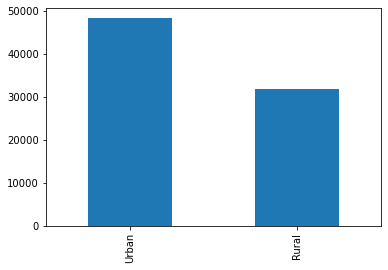

In [15]:
#creating a bar plot
df["residence_area_type"].value_counts().plot.bar()

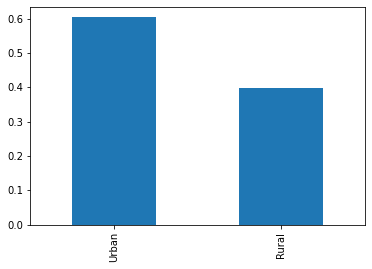

In [16]:
#creating percentages of area_type
(df["residence_area_type"].value_counts() / len(df["residence_area_type"])).plot.bar()

Observations :
From the above visuals, we can make the following observations:
* nearly about 0.4 % customes belongs to Rural area of residency
* nearly about 0.6 % customers belongs to Urban area of residency
   ~ maximum of the customers comes from Urban area of residency and thats a positive sign for the company

# Bivariate Analysis

Bivariate analysis involves checking the relationship between two variables simultaneously. In the code below, we plot every categorical feature against the target by plotting a barchart.

In [17]:
df.corr()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
id,1.000000,-0.004833,0.005184,-0.001798,-0.005660,-0.002125,0.003424,-0.002124,-0.003328,-0.005064
perc_premium_paid_by_cash_credit,-0.004833,1.000000,-0.259131,-0.031868,0.214470,0.214951,0.168125,-0.142670,-0.152837,-0.240980
age_in_days,0.005184,-0.259131,1.000000,0.029308,-0.058366,-0.072731,-0.059407,0.049888,0.176544,0.095103
Income,-0.001798,-0.031868,0.029308,1.000000,-0.001403,-0.017347,-0.012399,0.085746,0.079078,0.016541
Count_3-6_months_late,-0.005660,0.214470,-0.058366,-0.001403,1.000000,0.204228,0.296085,-0.082781,0.075828,-0.248900
Count_6-12_months_late,-0.002125,0.214951,-0.072731,-0.017347,0.204228,1.000000,0.266306,0.004785,-0.093133,-0.286159
Count_more_than_12_months_late,0.003424,0.168125,-0.059407,-0.012399,0.296085,0.266306,1.000000,-0.031726,-0.021848,-0.240385
application_underwriting_score,-0.002124,-0.142670,0.049888,0.085746,-0.082781,0.004785,-0.031726,1.000000,-0.270864,0.068715
no_of_premiums_paid,-0.003328,-0.152837,0.176544,0.079078,0.075828,-0.093133,-0.021848,-0.270864,1.000000,0.022664
target,-0.005064,-0.240980,0.095103,0.016541,-0.248900,-0.286159,-0.240385,0.068715,0.022664,1.000000


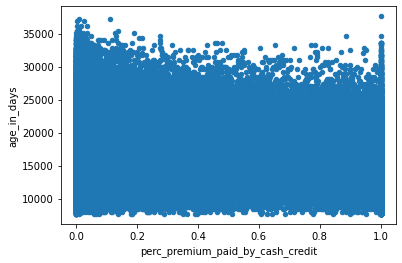

In [18]:
df.plot.scatter("perc_premium_paid_by_cash_credit","age_in_days")

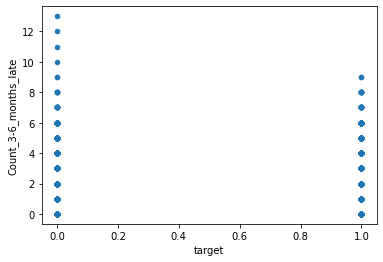

In [19]:
df.plot.scatter("target","Count_3-6_months_late")

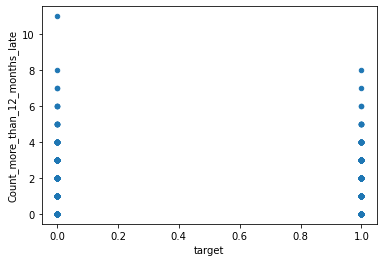

In [20]:
df.plot.scatter("target","Count_more_than_12_months_late")

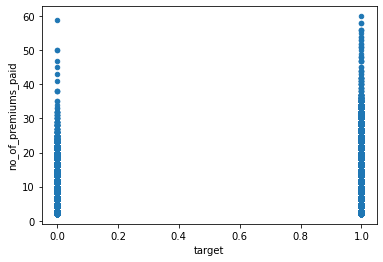

In [21]:
 df.plot.scatter("target","no_of_premiums_paid")

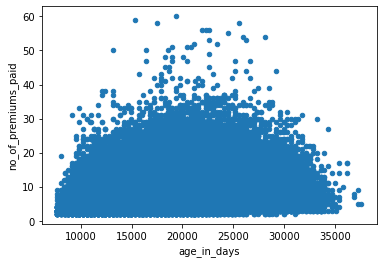

In [22]:
 df.plot.scatter("age_in_days","no_of_premiums_paid")

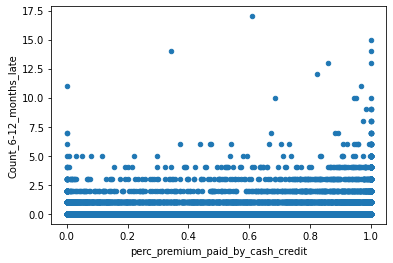

In [23]:
 df.plot.scatter("perc_premium_paid_by_cash_credit","Count_6-12_months_late")

## observations :
 
 * As the number of days increases the chances of paying the premium also decreases
 * The maximum no of premium are paid between  age in days from 1200 - 1500 
 * The number of premium paid is directly proportional to our target variable
 * As the count of the days increases the chances of fulfulling our target variable also decreases

# categorical - continuous variables

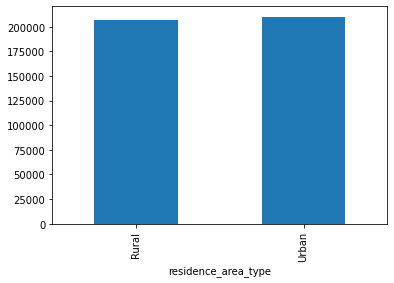

In [24]:
df.groupby("residence_area_type")["Income"].mean().plot.bar()

In [25]:
# performing t-test
from scipy.stats import ttest_ind
urbans = df[df["residence_area_type"]=="Urban"]
rurals = df[df["residence_area_type"]=="Rural"]
ttest_ind(urbans["Income"],rurals["Income"])

Ttest_indResult(statistic=0.9584859509626457, pvalue=0.3378206744407056)

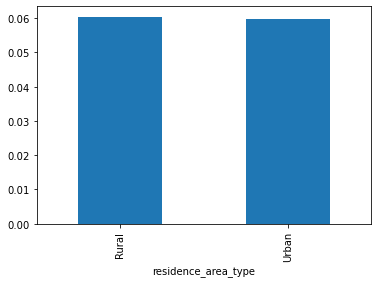

In [26]:
df.groupby("residence_area_type")["Count_more_than_12_months_late"].mean().plot.bar()

In [27]:
# performing t-test

#urbans = df[df["residence_area_type"]=="Urban"]
#rurals = df[df["residence_area_type"]=="Rural"]
#ttest_ind(urbans["Count_more_than_12_months_late"],rurals["Count_more_than_12_months_late"])

## Observations :
 
* The mean income of the proples living in urban areas are slightly high as compared to rural areas
* Also the nnumber of peoples paying premium late by more than 12 months are slightly higher in rural areas as compared to urban areas

##  Categorical-categorical Analysis


In [28]:
pd.crosstab(df["residence_area_type"],df["target"])

target,0,1
residence_area_type,,
Rural,1998,29672
Urban,3000,45183


In [29]:
pd.crosstab(df["residence_area_type"],df["sourcing_channel"])

sourcing_channel,A,B,C,D,E
residence_area_type,,,,,
Rural,17115,6506,4780,2999,270
Urban,26019,10006,7259,4560,339


In [30]:

#from scipy.stats import chi2_contigency

#chi2_contigency(pd.crosstab(df["residence_area_type"],df["sourcing_channel"]))

# Missing Value Treatment

In [31]:
df.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

In [32]:

# dropping rows where all the entries are missing
df.dropna(how="all")

# dropping columns where all the entries are missing
df.dropna(axis=1,how="all")

# filling the missing values of column(Count_6-12_months_late) with median
median =df["Count_3-6_months_late"].median()
df["Count_3-6_months_late"].fillna(median,inplace = True)

# filling the missing values of column(Count_6-12_months_late) with median
median =df["Count_6-12_months_late"].median()
df["Count_6-12_months_late"].fillna(median,inplace = True)

# filling the missing values of column(Count_more_than_12_months_late ) with median
median =df["Count_more_than_12_months_late"].median()
df["Count_more_than_12_months_late"].fillna(median,inplace = True)

# filling the missing values of column(application_underwriting_score  ) with median
median =df["application_underwriting_score"].median()
df["application_underwriting_score"].fillna(median,inplace = True)


In [33]:
df.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
target                              0
dtype: int64

So we can see that there is no presence of missing values in our data set. Now it has been cleaned with respective tools.

# Outliers Treatment

## Treating outliers in the continuous columns

* Outliers can be treated in a variety of ways. It depends on the skewness of the feature.
* To reduce right skewness, we use roots or logarithms or reciprocals (roots are weakest). This is the most common problem in practice.
* To reduce left skewness, we take squares or cubes or higher powers.

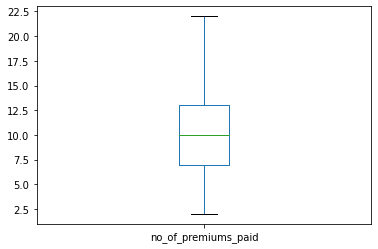

In [34]:
# detecting outliers in all continuous variables using box plot method
#df["no_of_premiums_paid"].plot.box()
# removing outliers from the dataset
df[df["no_of_premiums_paid"]<23]
df=df[df["no_of_premiums_paid"]<23]
df["no_of_premiums_paid"].plot.box()




C:\Users\onlyo\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


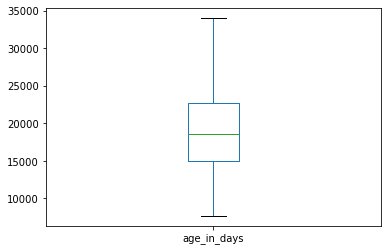

In [35]:
#removing outliers in column(age_in_days)
df.loc[df["age_in_days"]>34000,"age_in_days"]=np.median(df["age_in_days"])

df["age_in_days"].plot.box()


# Variable Transformation

## Variable Transformation is a process by which :-

* We replace a variable with some function of that variable
* We change the distribution or relationship of a variable

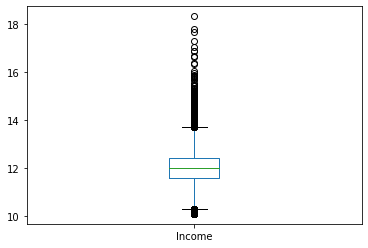

In [36]:
# changing income to its logarithimic form
np.log(df["Income"]).plot.box()



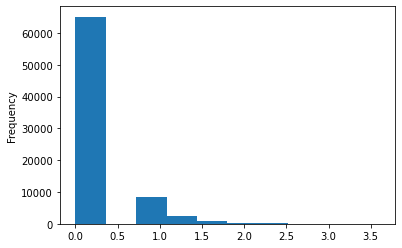

In [37]:
# changing 'Count_3-6_months_late' to its square form
np.sqrt(df["Count_3-6_months_late"],).plot.hist()


#  Model Building


In [38]:
df["target"].value_counts()
df=pd.get_dummies(df)

In [39]:
sf=pd.read_csv("new _test.csv")


In [40]:
print(df.shape)

(77538, 17)


In [41]:
print(sf.shape)

(34224, 11)


In [42]:
sf=pd.get_dummies(sf)

In [43]:
#making data set 
train = df[0:79855]
test =  sf

x_train=train.drop("target", axis=1)
y_train=train["target"]

x_test=test
#true_p=test["target"]





In [44]:
#importing libraries
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [45]:
pred=logreg.predict(x_test)

In [46]:
pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [47]:
logreg.score(x_train,y_train)

0.9376047873300833

In [48]:
df["target"].value_counts()

1    72700
0     4838
Name: target, dtype: int64

In [49]:
outcome = pd.DataFrame(pred)
pass_id = pd.read_csv('new _test.csv')['id']
result = pd.concat([pass_id,outcome], axis=1)
result.columns = ['id','target']
result.to_csv('final r.csv', columns=['id','target'], index=False)

In [50]:
kf=pd.read_csv("final r.csv")

In [51]:
kf["target"].value_counts()

1    34224
Name: target, dtype: int64

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
model =  DecisionTreeClassifier()

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [56]:
model.score(x_train,y_train)

1.0

In [57]:
model.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [65]:
outcome = pd.DataFrame(pred)
pass_id = pd.read_csv('new _test.csv')['id']
result = pd.concat([pass_id,outcome], axis=1)
result.columns = ['id','target']
result.to_csv('final254254.csv', columns=['id','target'], index=False)

In [58]:
kf["target"].value_counts()

1    34224
Name: target, dtype: int64

In [59]:
from sklearn.ensemble import RandomForestClassifier 

In [60]:
r=RandomForestClassifier()

In [61]:
r.fit(x_train,y_train)

RandomForestClassifier()

In [62]:
r.score(x_train,y_train)

0.9999871030978359

In [63]:
r.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [64]:
outcome = pd.DataFrame(pred)
pass_id = pd.read_csv('new _test.csv')['id']
result = pd.concat([pass_id,outcome], axis=1)
result.columns = ['id','target']
result.to_csv('65465final r.csv', columns=['id','target'], index=False)